In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

print (train_x.shape)
print (test_x.shape)
print (train_y.shape)
print (test_y.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
train_x = train_x.reshape((len(train_x), np.prod(train_x.shape[1:])))
test_x = test_x.reshape((len(test_x), np.prod(test_x.shape[1:])))

print (train_x.shape)
print (test_x.shape)

(60000, 784)
(10000, 784)


In [5]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x) # train_x.astype('float32') / 255.
test_x = scaler.fit_transform(test_x) # test_x = test_x.astype('float32') / 255.

print (train_x.shape)
print (test_x.shape)

(60000, 784)
(10000, 784)


In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
test_2d = tsne.fit_transform(test_x)

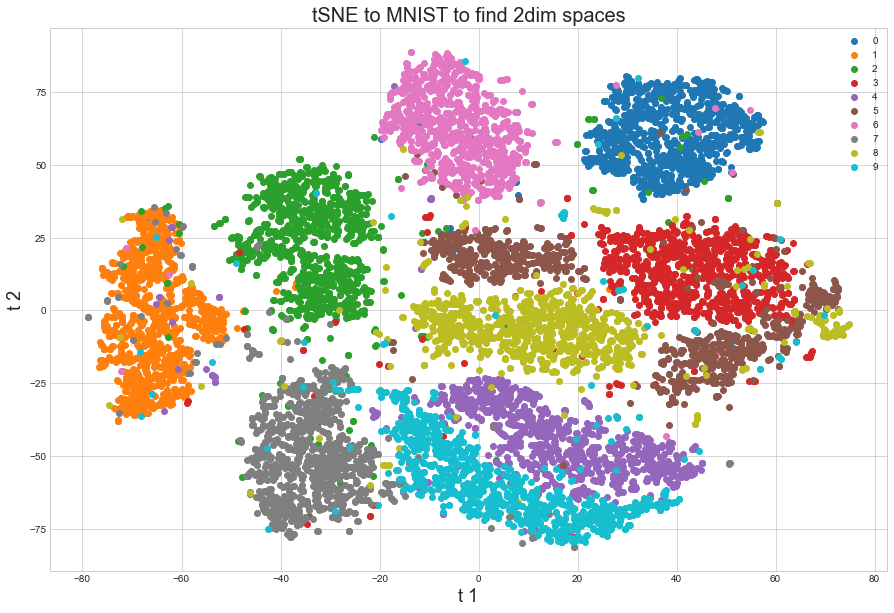

In [10]:
target_ids = range(len(np.unique(test_y)))

plt.figure(figsize=(15, 10))
for i, label in zip(target_ids, np.unique(test_y)):
    plt.scatter(test_2d[test_y == i, 0], test_2d[test_y == i, 1], label=label)
    
plt.legend()
plt.xlabel('t 1', fontsize=18)
plt.ylabel('t 2', fontsize=18)
plt.title('tSNE to MNIST to find 2dim spaces', fontsize=20)
plt.show()